<a href="https://colab.research.google.com/github/abimouloud/TokenMixer/blob/main/TokenMixer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advancing breast cancer diagnosis: token vision transformers for faster and accurate classification of histopathology images


**Authors:** [Aritra Roy Gosthipaty](https://twitter.com/ariG23498), [Sayak Paul](https://twitter.com/RisingSayak) (equal contribution)<br>
**Date created:** 2021/12/10<br>
**Last modified:** 2025/01/10 by: [ABIMOULOUD mouhamed laid ](https://www.researchgate.net/profile/Abimouloud-Mouhamed-Laid)<br>
**Description:** Advancing breast cancer diagnosis: token
vision transformers for faster and accurate
classification of histopathology images<br>
**Cite this article:** Abimouloud, M.L., Bensid, K., Elleuch, M. et al. Advancing breast cancer diagnosis: token vision transformers for faster and accurate classification of histopathology images. Vis. Comput. Ind. Biomed. Art 8, 1 (2025). https://doi.org/10.1186/s42492-024-00181-8

In [ ]:
!pip install -U tensorflow-addons

In [ ]:
!pip install --upgrade pip
!pip install --upgrade tensorflow
!pip install --upgrade mediapipe-model-maker

  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Atte

## Imports

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import math

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import tensorflow as tf

from keras.applications import imagenet_utils
from tensorflow.keras import layers
from tensorflow import keras

import tensorflow_datasets as tfds
import tensorflow_addons as tfa
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
import numpy as np
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score

tfds.disable_progress_bar()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Transfer 'jpg' images to an array IMG
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)

            img = cv2.resize(img, (RESIZE,RESIZE))

            IMG.append(np.array(img))
    return IMG



benign_train = np.array(Dataset_loader('/content/drive/MyDrive/breskhisv1/200/train/Benign',224))
malign_train = np.array(Dataset_loader('/content/drive/MyDrive/breskhisv1/200/train/Malignant',224))
benign_test = np.array(Dataset_loader('/content/drive/MyDrive/breskhisv1/200/test/Benign',224))
malign_test = np.array(Dataset_loader('/content/drive/MyDrive/breskhisv1/200/test/Malignant',224))

100%|██████████| 278/278 [00:06<00:00, 46.30it/s]


In [ ]:

benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))
benign_test_label = np.zeros(len(benign_test))
malign_test_label = np.ones(len(malign_test))

# Merge data
X_train = np.concatenate((benign_train, malign_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)
X_test = np.concatenate((benign_test, malign_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malign_test_label), axis = 0)

# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

# Shuffle test data
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

# To categorical
Y_train = to_categorical(Y_train, num_classes= 2)
Y_test = to_categorical(Y_test, num_classes= 2)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train,
    test_size=0.2,
    random_state=11
)

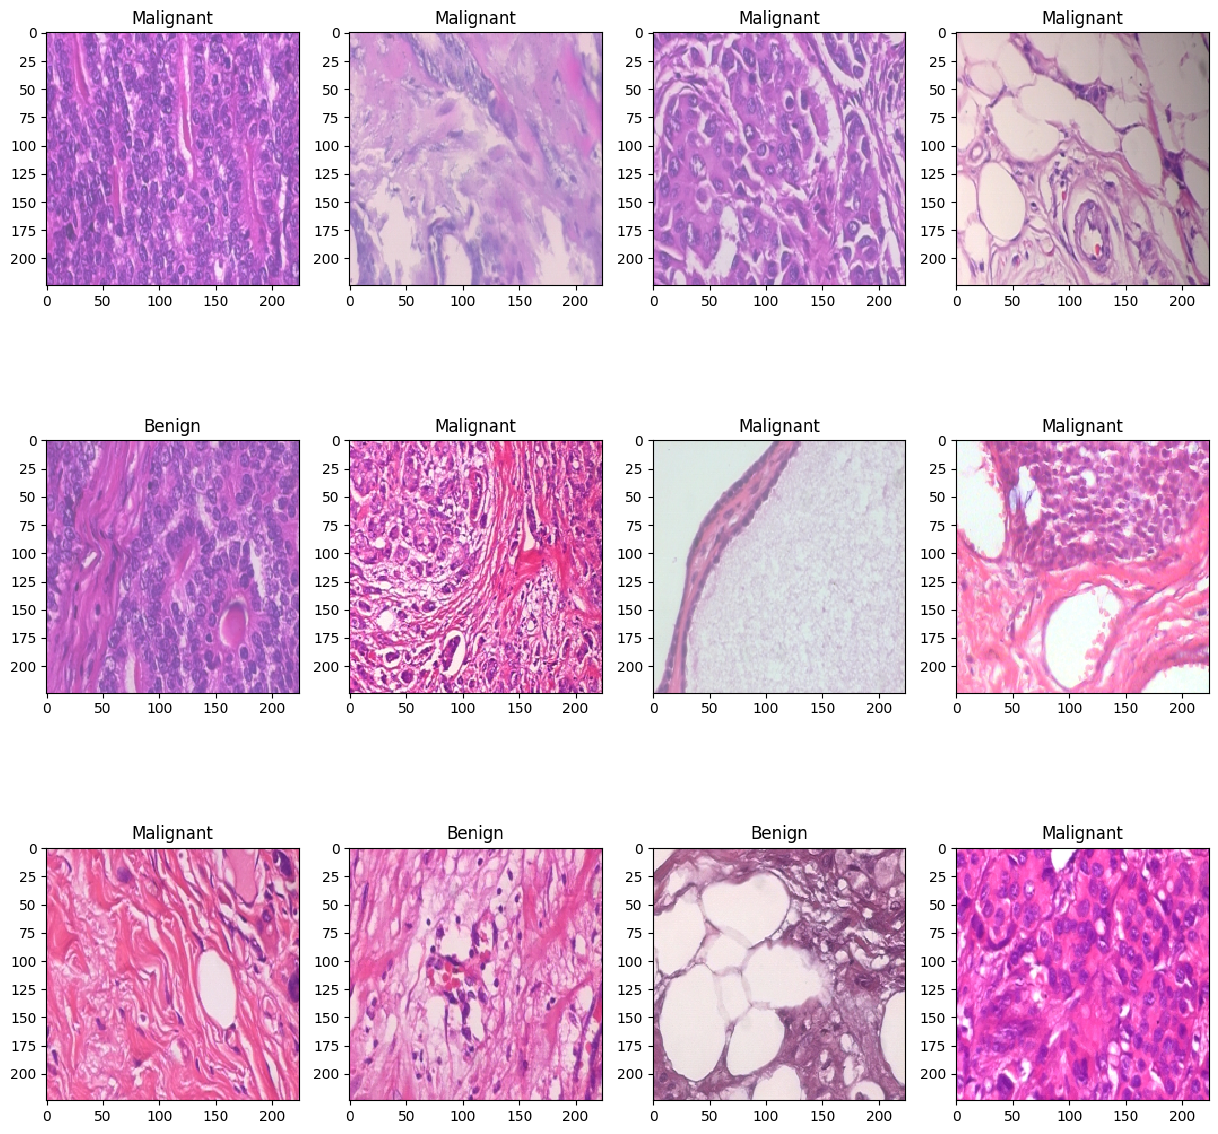

In [ ]:
# # Display first 15 images of moles, and how they are classified
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(Y_train[i]) == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x_train[i], interpolation='nearest')
plt.show()

In [ ]:
# DATA
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 2

# OPTIMIZER
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 1e-4

# TRAINING
EPOCHS = 5

# AUGMENTATION
IMAGE_SIZE = 224  # We will resize input images to this size.
PATCH_SIZE = 14 # Size of the patches to be extracted from the input images.
NUM_PATCHES = (IMAGE_SIZE // PATCH_SIZE) ** 2

# ViT ARCHITECTURE
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 128
NUM_HEADS = 4
NUM_LAYERS = 4
MLP_UNITS = [
    PROJECTION_DIM * 2,
    PROJECTION_DIM,
]

# TOKENLEARNER
NUM_TOKENS = 4

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),

        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [ ]:

def position_embedding(
    projected_patches, num_patches=NUM_PATCHES, projection_dim=PROJECTION_DIM
):
    # Build the positions.
    positions = tf.range(start=0, limit=num_patches, delta=1)

    # Encode the positions with an Embedding layer.
    encoded_positions = layers.Embedding(
        input_dim=num_patches, output_dim=projection_dim
    )(positions)

    # Add encoded positions to the projected patches.
    return projected_patches + encoded_positions


In [ ]:

def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def activation_block(x):
    x = layers.Activation("gelu")(x)
    return layers.BatchNormalization()(x)

def token_learner(inputs, number_of_tokens=4, kernel_size=(3, 3)):
    # Layer normalize the inputs.
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)  # (B, H, W, C)

    # Applying Depthwise Conv2D => Pointwise Conv2D => BatchNormalization
    x = layers.DepthwiseConv2D(kernel_size=kernel_size, padding="same")(x)
    x = activation_block(x)

    # Reshape the input to align it with the output of the conv block.
    num_filters = inputs.shape[-1]
    inputs = layers.Reshape((-1, num_filters))(inputs)  # inputs == (B, H*W, C)

    # Element-Wise multiplication of the attention maps and the inputs
    attention_maps = (
        layers.Conv2D(
            filters=number_of_tokens,
            kernel_size=(3, 3),
            activation=tf.nn.gelu,
            padding="same",
            use_bias=False
        )(x)
    )  # (B, H, W, num_of_tokens)

    attention_maps = layers.Reshape((-1, number_of_tokens))(attention_maps)  # (B, H*W, num_of_tokens)
    attention_maps = layers.Permute((2, 1))(attention_maps)  # (B, num_of_tokens, H*W)

    # Element-Wise multiplication of the attention maps and the inputs
    attended_inputs = tf.math.multiply(
        attention_maps[..., tf.newaxis], inputs[:, tf.newaxis, :]
    )  # (B, num_tokens, H*W, C)

    # Global average pooling the element-wise multiplication result.
    outputs = tf.reduce_mean(attended_inputs, axis=2)  # (B, num_tokens, C)
    return outputs

# Example usage:
input_tensor = layers.Input(shape=(224, 224, 3))
output_tensor = token_learner(input_tensor)
model = models.Model(inputs=input_tensor, outputs=output_tensor)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def activation_block(x):
    x = layers.Activation("gelu")(x)
    return layers.BatchNormalization()(x)

def token_learner(inputs, number_of_tokens=4, kernel_size=(3, 3)):
    # Layer normalize the inputs.
    x = layers.LayerNormalization(epsilon=1e-5)(inputs)  # (B, H, W, C)

    # Applying Depthwise Conv2D => Pointwise Conv2D => BatchNormalization
    x = layers.DepthwiseConv2D(kernel_size=kernel_size, padding="same")(x)
    x = activation_block(x)

    # Reshape the input to align it with the output of the conv block.
    num_filters = inputs.shape[-1]
    inputs_reshaped = layers.Reshape((-1, num_filters))(inputs)  # inputs == (B, H*W, C)

    # Element-Wise multiplication of the attention maps and the inputs
    attention_maps = keras.Sequential(
        [
            layers.Conv2D(
                filters=number_of_tokens,
                kernel_size=(3, 3),
                activation=tf.nn.gelu,
                padding="same",
                use_bias=False,
            ),
            layers.Conv2D(
                filters=number_of_tokens,
                kernel_size=(3, 3),
                activation=tf.nn.gelu,
                padding="same",
                use_bias=False,
            ),
            layers.Conv2D(
                filters=number_of_tokens,
                kernel_size=(3, 3),
                activation=tf.nn.gelu,
                padding="same",
                use_bias=False,
            ),
            # This conv layer will generate the attention maps
            layers.Conv2D(
                filters=number_of_tokens,
                kernel_size=(3, 3),
                activation="sigmoid",  # Note sigmoid for [0, 1] output
                padding="same",
                use_bias=False,
            ),
        ]
    )(x)  # (B, H, W, num_of_tokens)

    attention_maps = layers.Reshape((-1, number_of_tokens))(attention_maps)  # (B, H*W, num_of_tokens)
    attention_maps = layers.Permute((2, 1))(attention_maps)  # (B, num_of_tokens, H*W)

    # Element-Wise multiplication of the attention maps and the inputs
    attended_inputs = tf.math.multiply(
        attention_maps[..., tf.newaxis], inputs_reshaped[:, tf.newaxis, :]
    )  # (B, num_tokens, H*W, C)

    # Global average pooling the element-wise multiplication result.
    outputs = tf.reduce_mean(attended_inputs, axis=2)  # (B, num_tokens, C)
    return outputs

# Example usage:
input_tensor = layers.Input(shape=(224, 224, 3))
output_tensor = token_learner(input_tensor)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

# Save the model
model.save("token_learner.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Transformer block

In [ ]:

def transformer(encoded_patches):
    # Layer normalization 1.
    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])

    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS, dropout_rate=0.1)

    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches


In [ ]:

def create_vit_classifier(use_token_learner=True, token_learner_units=NUM_TOKENS):
    inputs = layers.Input(shape=INPUT_SHAPE)  # (B, H, W, C)

    # Augment data.
    augmented = data_augmentation(inputs)

    # Create patches and project the pathces.
    projected_patches = layers.Conv2D(
        filters=PROJECTION_DIM,
        kernel_size=(PATCH_SIZE, PATCH_SIZE),
        strides=(PATCH_SIZE, PATCH_SIZE),
        padding="VALID",
    )(augmented)
    _, h, w, c = projected_patches.shape
    projected_patches = layers.Reshape((h * w, c))(
        projected_patches
    )  # (B, number_patches, projection_dim)

    # Add positional embeddings to the projected patches.
    encoded_patches = position_embedding(
        projected_patches
    )  # (B, number_patches, projection_dim)
    encoded_patches = layers.Dropout(0.1)(encoded_patches)

    # Iterate over the number of layers and stack up blocks of
    # Transformer.
    for i in range(NUM_LAYERS):
        # Add a Transformer block.
        encoded_patches = transformer(encoded_patches)

        # Add TokenLearner layer in the middle of the
        # architecture. The paper suggests that anywhere
        # between 1/2 or 3/4 will work well.
        if use_token_learner and i == NUM_LAYERS // 2:
            _, hh, c = encoded_patches.shape
            h = int(math.sqrt(hh))
            encoded_patches = layers.Reshape((h, h, c))(
                encoded_patches
            )  # (B, h, h, projection_dim)
            encoded_patches = token_learner(
                encoded_patches, token_learner_units
            )  # (B, num_tokens, c)

    # Layer normalization and Global average pooling.
    representation = layers.LayerNormalization(epsilon=LAYER_NORM_EPS)(encoded_patches)
    representation = layers.GlobalAvgPool1D()(representation)

    # Classify outputs.
    outputs = layers.Dense(NUM_CLASSES, activation="sigmoid")(representation)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from tensorflow import keras
import time


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 224, 224, 3)          7         ['input_4[0][0]']             
 ial)                                                                                             
                                                                                                  
 conv2d_10 (Conv2D)          (None, 16, 16, 128)          75392     ['data_augmentation[1][0]']   
                                                                                                  
 reshape_8 (Reshape)         (None, 256, 128)             0         ['conv2d_10[0][0]']     

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


46/46 [==============================] - 21s 133ms/step - loss: 0.4276 - accuracy: 0.8144 - val_loss: 0.3573 - val_accuracy: 0.8634
Epoch 2/5
46/46 [==============================] - 4s 88ms/step - loss: 0.3261 - accuracy: 0.8634 - val_loss: 0.4340 - val_accuracy: 0.8199
Epoch 3/5
46/46 [==============================] - 4s 86ms/step - loss: 0.3082 - accuracy: 0.8703 - val_loss: 0.3430 - val_accuracy: 0.8571
Epoch 4/5
46/46 [==============================] - 7s 159ms/step - loss: 0.2720 - accuracy: 0.8882 - val_loss: 0.2886 - val_accuracy: 0.8820
Epoch 5/5
13/13 [==============================] - 1s 39ms/step - loss: 0.2517 - accuracy: 0.8958
Test accuracy: 89.58%
Total Training Time (s): 52.07244801521301
Average Training Time per Epoch (s): 10.414489603042602
13/13 [==============================] - 1s 28ms/step


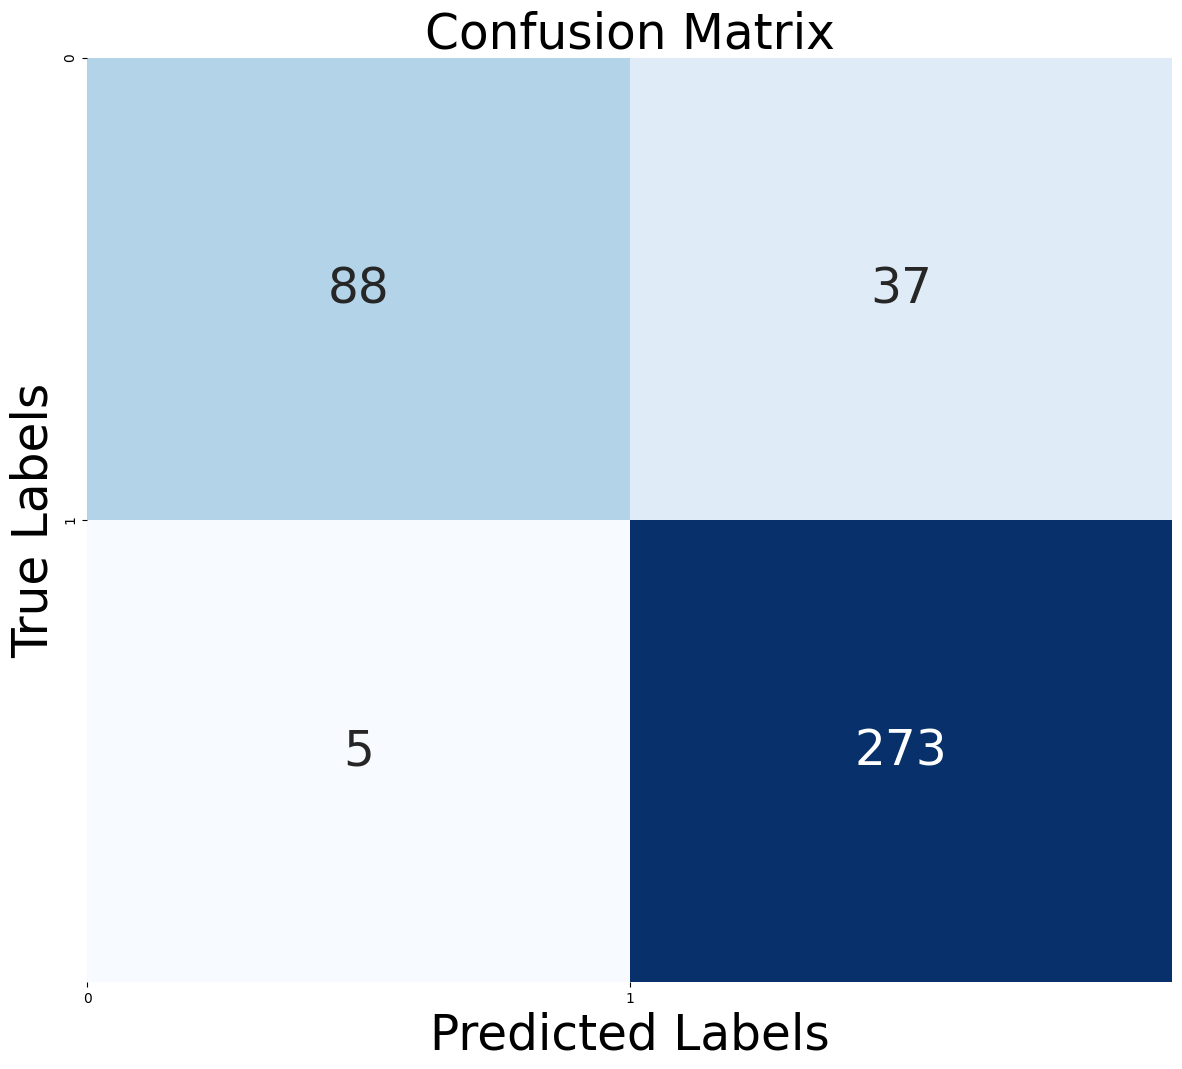

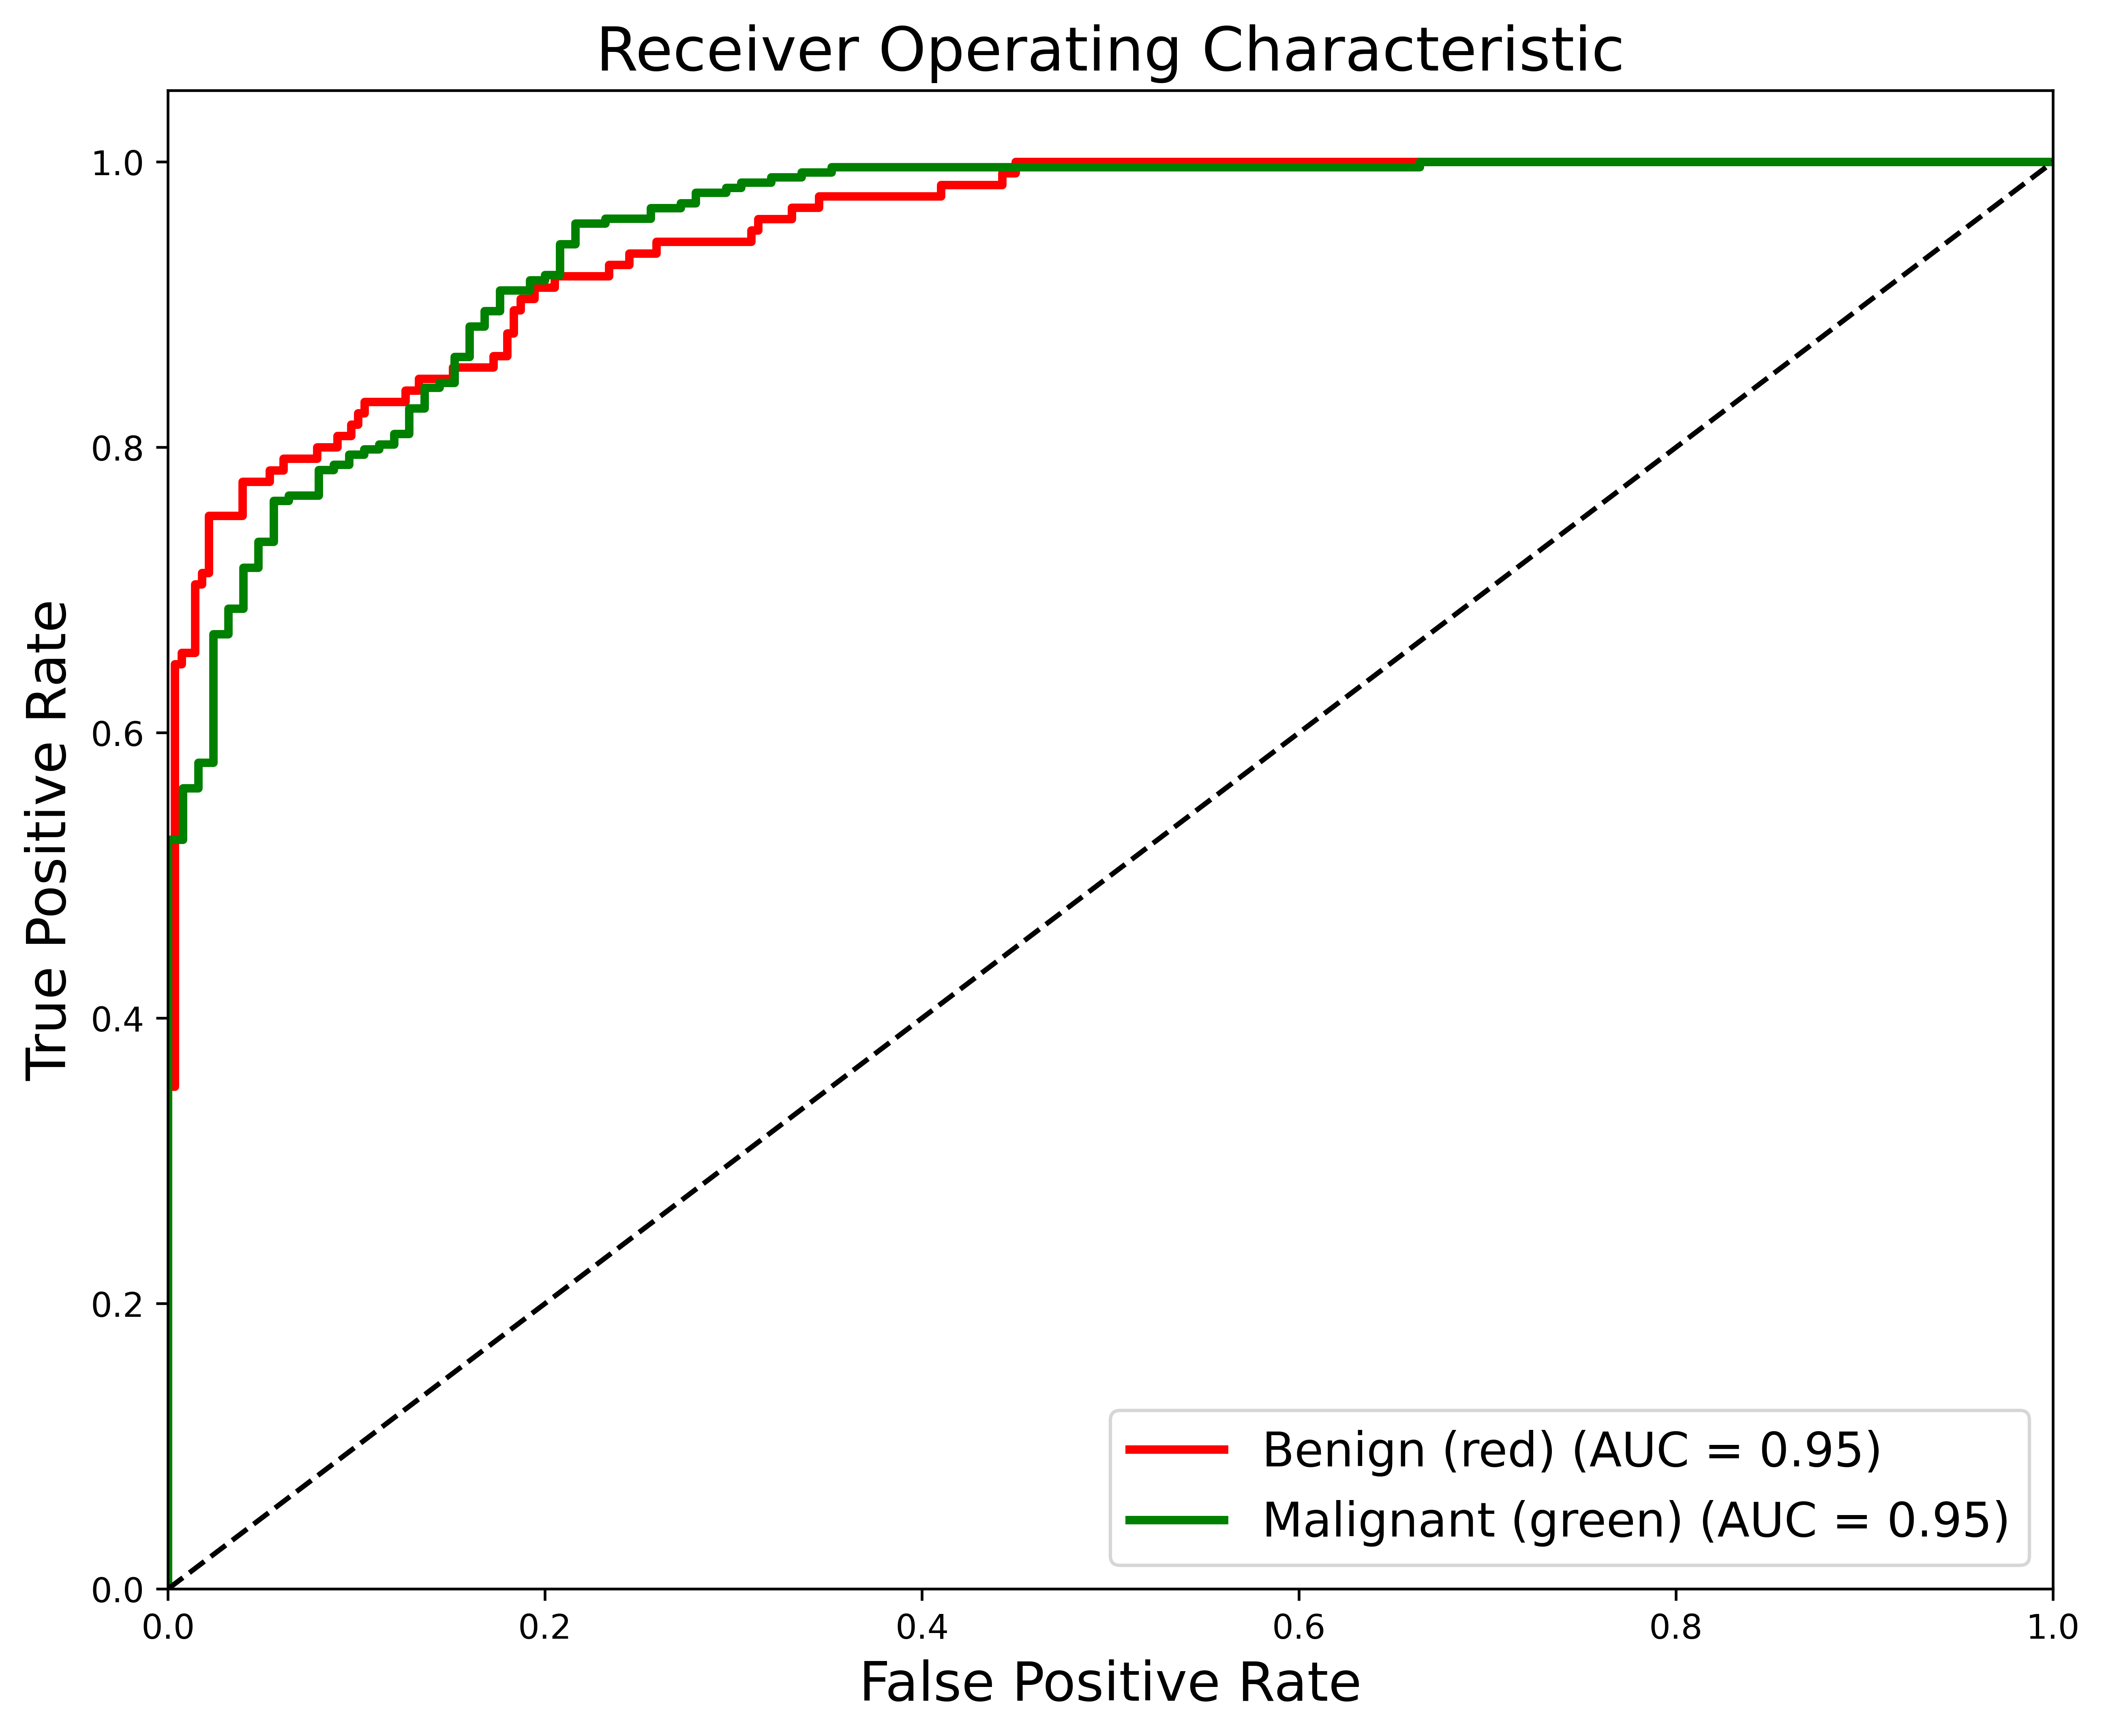

Mean Precision: 0.9134408602150538
Mean Sensitivity: 0.8430071942446042
Mean Specificity: 0.8430071942446042
AUC: 0.9498992805755396
F1 Score: 0.8679554390563564


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from tensorflow import keras
import time
from PIL import Image

def run_experiment(model):
    optimizer = 'adam'

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=["accuracy"]
    )

    checkpoint_filepath = "/content/drive/MyDrive/SAVE"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    start_time = time.time()
    history = model.fit(
        x=X_train,
        y=Y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )
    end_time = time.time()

    model.load_weights(checkpoint_filepath)
    _, accuracy = model.evaluate(X_test, Y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    total_training_time = end_time - start_time
    avg_training_time_per_epoch = total_training_time / EPOCHS

    print("Total Training Time (s):", total_training_time)
    print("Average Training Time per Epoch (s):", avg_training_time_per_epoch)

    Y_pred = model.predict(X_test)

    cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
    true_positives = np.diag(cm)
    false_positives = np.sum(cm, axis=0) - true_positives
    false_negatives = np.sum(cm, axis=1) - true_positives
    true_negatives = np.sum(cm) - (true_positives + false_positives + false_negatives)

    precision = true_positives / (true_positives + false_positives)
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)

    y_test_labels = np.argmax(Y_test, axis=1)
    y_pred_probabilities = Y_pred[:, 1]
    auc = roc_auc_score(y_test_labels, y_pred_probabilities)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

    fpr_0, tpr_0, _ = roc_curve(Y_test[:, 0], Y_pred[:, 0])
    auc_0 = roc_auc_score(Y_test[:, 0], Y_pred[:, 0])

    fpr_1, tpr_1, _ = roc_curve(Y_test[:, 1], Y_pred[:, 1])
    auc_1 = roc_auc_score(Y_test[:, 1], Y_pred[:, 1])

    classes = range(NUM_CLASSES)
    plt.figure(figsize=(14, 12))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 35})
    plt.title("Confusion Matrix", size=35)
    plt.xlabel("Predicted Labels", size=35)
    plt.ylabel("True Labels", size=35)
    plt.xticks(ticks=classes, labels=classes)
    plt.yticks(ticks=classes, labels=classes)
    plt.show()

    # Plot ROC curve for both classes with enhanced settings
    plt.figure(figsize=(10, 8), dpi=600)
    plt.plot(fpr_0, tpr_0, color='red', linewidth=2.5, label=f'Benign (red) (AUC = {auc_0:.2f})')
    plt.plot(fpr_1, tpr_1, color='green', linewidth=2.5, label=f'Malignant (green) (AUC = {auc_1:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver Operating Characteristic', fontsize=18)
    plt.legend(loc="lower right", prop={'size': 14})

    # Save ROC figure in PNG format
    png_filename = "ROC_Curve.png"
    plt.savefig(png_filename, format='png', dpi=600)
    plt.show()

    # Convert PNG to BMP
    bmp_filename = "ROC_Curve.bmp"
    Image.open(png_filename).save(bmp_filename, format='BMP')




    print("Mean Precision:", np.mean(precision))
    print("Mean Sensitivity:", np.mean(sensitivity))
    print("Mean Specificity:", np.mean(specificity))
    print("AUC:", np.mean(auc))
    print("F1 Score:", np.mean(f1))


    return history
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


